# CAC - I

Name: **Krish Agarwal** <br>
Reg No: **21112016** <br>
Class: **5BSc DS A** <br>
Date: 19/09/2023

---------------

## `Probelm Definition`:
<br>

1. **Medical Image Enhancement**
    1. *Select a medical image, such as an X-ray or MRI scan, and implement image enhancement techniques to improve its diagnostic quality. Discuss the potential significance of these enhancements in the context of medical diagnosis. Present both the original and enhanced images to illustrate the improvements*
1. **Lavasa Image Processing Integration**
    1. *Capture images of Lavasa encompassing various elements of nature, buildings, and people. Integrate at least seven different image processing techniques into the project. Ensure that the project includes user interaction elements, allowing for user engagement and exploration of the processed images*

## `Objective`: 
<br>

1. **Medical Image Enhancement**
    1. *Select a medical image (e.g., X-ray, MRI) and apply image enhancement techniques to improve its diagnostic quality*
    1. *Discuss the potential impact on medical diagnosis and present the original and enhanced images*
2. **Image Selection**
    1. *Click picture of Lavasa (nature, buildings, people, etc.)*
    1. *Image Processing Integration*
        1. *Identify at least 7 image processing techniques. Ensure that the project includes user interaction elements*

## `References`:
<br>

1. **Kaggle (Data)**: https://www.kaggle.com/c/rsna-intracranial-hemorrhage-detection/data
1. **National Center for Biotechnology Information**: https://www.ncbi.nlm.nih.gov/books/NBK547721/
1. **Vincent Blog (1)**: https://vincentblog.xyz/posts/medical-images-in-python-computed-tomography
1. **Vincent Blog (2)**: https://vincentblog.xyz/posts/magnetic-resonance-imaging-and-positron-emission-tomography-images
1. **SciPy API (1)**: https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.label.html
1. **SciPy v0.8.dev Reference Guide**: http://library.isr.ist.utl.pt/docs/scipy/generated/scipy.ndimage.measurements.label.html
1. **Stack Overflow (1)**: https://stackoverflow.com/questions/10193971/rescale-slope-and-rescale-intercept
1. **Stack Overflow (2)**: https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings
1. **Pydicom API**: https://pydicom.github.io/pydicom/dev/reference/generated/pydicom.pixel_data_handlers.apply_rescale.html
1. **NumPy API**: https://numpy.org/doc/stable/reference/generated/numpy.bincount.html
1. **GeekForGeeks**: https://www.geeksforgeeks.org/numpy-argmax-python/ 
1. **SciPy API (2)**: https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.binary_fill_holes.html 
1. **OpenCV API (1)**: https://docs.opencv.org/4.x/d4/d73/tutorial_py_contours_begin.html
1. **OpenCV API (2)**: https://docs.opencv.org/4.x/d9/d8b/tutorial_py_contours_hierarchy.html

## `Code`:

### `Q1) Select a medical image and apply image enhancement techniques to improve its diagnostic quality`

## `About the Image`:  

- **Theory**
    - Computer Tomography is a scanning that takes images of X-rays which are sent to the body from different angles and combined using a computer processor to access cross-sectional images (slices) of bones, blood vessels, and soft tissues in various parts of the body
    - provide more detailed information than regular x-ray images
    - anomalies in the bones, veins or tissues of the patient are much more easily detectable

- **Technical Details**
    - 2D Brain CT images (obtained from Kaggle)
    - DICOM (Digital Imaging and Communication in Medicine) format (.dcm extension)
    - Both a communication protocol and a file format
    - Patient can store medical information such as ultrasound and MRI images along with their information in a single file
    - Ensures that the information is transferred between devices that support the DICOM format

In [1]:
# importing necessary libraries/modules
import warnings
warnings.filterwarnings("ignore")

import cv2
import pydicom
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from skimage import morphology
import math
import pylab

In [2]:
# importig the image through the pydicom library
original_image = pydicom.read_file("D:/Z/Downloads/ID_000012eaf.dcm")

# converting the image to a matrix
image = original_image.pixel_array

### Basic Summary of the image

In [3]:
# Meta Data of the DICOM image
original_image

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 188
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.4267.32.337944818669776895705763408052798539612
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: ID_000012eaf
(0008, 0060) Modality                            CS: 'CT'
(0010, 0020) Patient ID                          LO: 'ID_f15c0eee'
(0020, 000d) Study Instance UID                  UI: ID_30ea2b02d4
(0020, 000e) Series Instance UID                 UI: ID_0ab5820b2a
(0020, 0010) Study ID                            SH: '

In [4]:
# Dimensions of the image
print(f"The image has {image.shape[0]} rows and {image.shape[1]} columns")

The image has 512 rows and 512 columns


In [5]:
# Minimum and Maximum Pixel Value
print(f"The image's minimum pixel is {image.min()} and maximum is {image.max()}")

The image's minimum pixel is -2000 and maximum is 2954


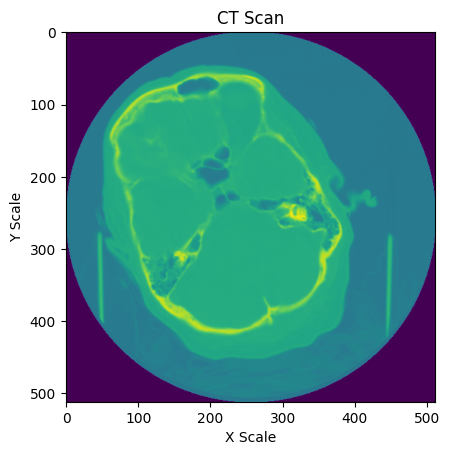

In [6]:
plt.title("CT Scan")
plt.xlabel("X Scale")
plt.ylabel("Y Scale")
plt.imshow(image)
plt.show()

### Pre-Processing

**About the Hounsfield Unit**  
1. The Hounsfield Unit (HU) is a relative quantitative measurement of the intensity of radio waves used by radiologists for better explanation and understanding of computed tomography (CT) images
1. The absorption/attenuation coefficient of radiation within a tissue is used during CT reconstruction to produce a grayscale image
1. More dense tissue, with greater X-ray beam absorption, has positive values and appears bright
1. Less dense tissue, with less X-ray beam absorption, has negative values and appears dark

In [7]:
def transformToHU(medical_image, image):
    
    # The rescale slope and rescale intercept allow to transform the pixel values to HU or other units
    # output:  (min. pixel value * Rescale Slope + Rescale Intercept) to (max. pixel value * Rescale Slope + Rescale Intercept)
    
    intercept = medical_image.RescaleIntercept
    slope = medical_image.RescaleSlope
    hu_image = image * slope + intercept # HU = (pixel value * Rescale Slope) + Rescale Intercept

    return hu_image

In [8]:
# adjust the display of pixel values in an image to make certain structures 
# or tissues more visible and enhance the diagnostic quality

def windowImage(image, window_center, window_width):
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    window_image = image.copy()
    window_image[window_image < img_min] = img_min
    window_image[window_image > img_max] = img_max
    
    return window_image

In [9]:
def removeNoise(file_path, display=False):
    medical_image = pydicom.read_file(file_path)
    image = medical_image.pixel_array
    
    hu_image = transformToHU(medical_image, image)
    brain_image = windowImage(hu_image, 40, 80) #bone windowing
    
    # Dilation adds pixels to the boundaries of objects in an image
    segmentation = morphology.dilation(brain_image, np.ones((1, 1))) 
    
    # labelling features in an array
    # Any non-zero values in input are counted as features and zero values are considered the background
    labels, label_nb = ndimage.label(segmentation)
    
    # Count number of occurrences of each value in array of non-negative ints
    label_count = np.bincount(labels.ravel().astype(np.int)) # ravel() --> returns contiguous flattened array
    label_count[0] = 0

    mask = labels == label_count.argmax() # returns indices of the max element of the array in a particular axis
 
    mask = morphology.dilation(mask, np.ones((1, 1)))
    mask = ndimage.morphology.binary_fill_holes(mask) # Fill the holes in binary objects|
    mask = morphology.dilation(mask, np.ones((3, 3)))
    masked_image = mask * brain_image
    
    if display:
        plt.figure(figsize=(15, 2.5))
        plt.subplot(141)
        plt.imshow(brain_image)
        plt.title('Original Image')
        plt.axis('off')
        
        plt.subplot(142)
        plt.imshow(mask)
        plt.title('Mask')
        plt.axis('off')

        plt.subplot(143)
        plt.imshow(masked_image)
        plt.title('Final Image')
        plt.axis('off')
    
    return masked_image

In [10]:
# as the scan was initially tilted, this function straightens it out

def rotateImage(image):

    img = np.uint8(image)
    
    # joining all the continuous points (along the boundary), having same color or intensity
    # RETR_EXTERNAL --> it returns only extreme outer flags; all child contours are left behind
    # CHAIN_APPROX_SIMPLE --> it removes all redundant points and compresses the contour
    contours, hier = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    mask = np.zeros(img.shape, np.uint8)

    # find the biggest contour (c) by the area
    c = max(contours, key = cv2.contourArea) 

    (x, y), (MA, ma), angle = cv2.fitEllipse(c)

    cv2.ellipse(img, ((x, y), (MA, ma), angle), color = (0, 255, 0), thickness=2)

    rmajor = max(MA, ma)/2
    
    if angle > 90:
        angle -= 90
    else:
        angle += 90
        
    xtop = x + math.cos(math.radians(angle))*rmajor
    ytop = y + math.sin(math.radians(angle))*rmajor
    xbot = x + math.cos(math.radians(angle+180))*rmajor
    ybot = y + math.sin(math.radians(angle+180))*rmajor
    cv2.line(img, (int(xtop), int(ytop)), (int(xbot), int(ybot)), (0, 255, 0), 3)

    # used to make the transformation matrix M which will be used for rotating a image
    M = cv2.getRotationMatrix2D((x, y), angle-90, 1)  #transformation matrix

    # An affine transformation is any transformation that preserves collinearity, parallelism 
    # as well as the ratio of distances between the points
    img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]), cv2.INTER_CUBIC)
    
    return img

In [11]:
# Cropping the area out which contains mask

def cropImage(image, display=False):
    # Create a mask with the background pixels
    mask = image == 0

    # Find the brain area
    coords = np.array(np.nonzero(~mask))
    top_left = np.min(coords, axis=1)
    bottom_right = np.max(coords, axis=1)
    
    # Remove the background
    croped_image = image[top_left[0]:bottom_right[0],
                top_left[1]:bottom_right[1]]
    
    return croped_image

In [12]:
# adding space around the cropped image to center the scan 

def addPadding(image, new_height=512, new_width=512):
    height, width = image.shape

    final_image = np.zeros((new_height, new_width))

    pad_left = int((new_width - width) // 2)
    pad_top = int((new_height - height) // 2)
    
    
    # Replace the pixels with the image's pixels
    final_image[pad_top:pad_top + height, pad_left:pad_left + width] = image
    
    return final_image

In [13]:
# To display all the steps of the images

def displayImages(image, noiseless_image, cropped_image, final_image):
    
    fig1, ax = plt.subplots(1, 4, figsize = (8, 8))
    fig1.tight_layout()

    ax[0].imshow(image)
    ax[0].set_title("Original")

    ax[1].imshow(noiseless_image)
    ax[1].set_title("Noiseless")

    ax[2].imshow(cropped_image)
    ax[2].set_title("Cropped & Rotated")

    ax[3].imshow(final_image)
    ax[3].set_title("Final")

    plt.show()

In [14]:
# Applying the above functions to the image
noiseless_image  = removeNoise("D:/Z/Downloads/ID_000012eaf.dcm")
cropped_image = cropImage(rotateImage(noiseless_image))
final_image = addPadding(cropped_image)

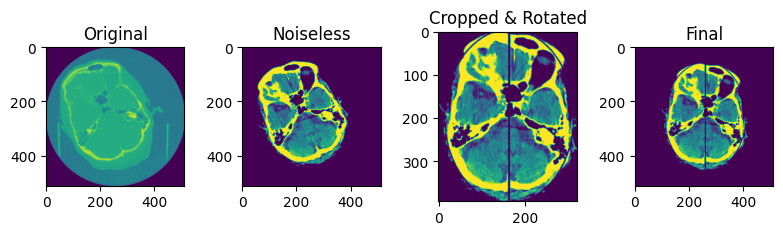

In [15]:
displayImages(image, noiseless_image, cropped_image, final_image)

### Testing the function on a other images

Image 2

In [16]:
image_ = pydicom.read_file("D:/Z/Downloads/ID_000229f2a.dcm").pixel_array
noiseless_image_  = removeNoise("D:/Z/Downloads/ID_000229f2a.dcm")
cropped_image_ = cropImage(rotateImage(noiseless_image_))
final_image_ = addPadding(cropped_image_)

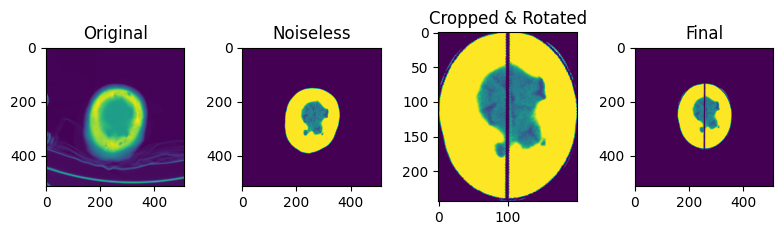

In [17]:
displayImages(image_, noiseless_image_, cropped_image_, final_image_)

Image 3

In [18]:
image__ = pydicom.read_file("D:/Z/Downloads/ID_000000e27.dcm").pixel_array
noiseless_image__  = removeNoise("D:/Z/Downloads/ID_000000e27.dcm")
cropped_image__ = cropImage(rotateImage(noiseless_image__))
final_image__ = addPadding(cropped_image__)

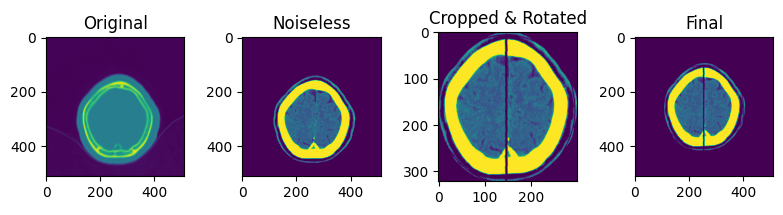

In [19]:
displayImages(image__, noiseless_image__, cropped_image__, final_image__)

<hr>

### `Q2A) Click picture of Lavasa`

In [20]:
# importing image
image = cv2.imread("D:/Z/Downloads/lavasa picture.jpg")

# changing the colour spaces to RGB and GRAYSCALE
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

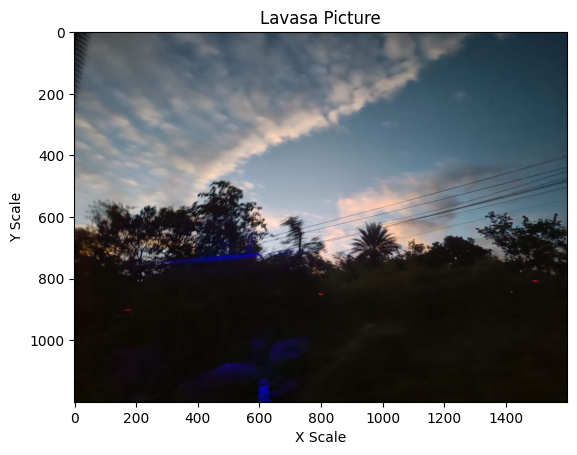

In [21]:
plt.title("Lavasa Picture")
plt.xlabel("X Scale")
plt.ylabel("Y Scale")
plt.imshow(rgb_image)
plt.show()

### `Q2B) Identify at least 7 image processing techniques. Ensure that the project includes user interaction elements `

In [30]:
class SceneryImageProcessor:
    def __init__(self, image_path):
        self.image = cv2.imread(image_path)

    def applyGrayscale(self):
        """Convert the image to grayscale."""
        return cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
    
    def applyRGB(self):
        """Convert the image to grayscale."""
        return cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)

    def applyBlur(self, kernel_size=(5, 5)):
        """Apply Gaussian blur to reduce noise."""
        return cv2.GaussianBlur(self.image, kernel_size, 0)

    def applySharpen(self):
        """Apply sharpening filter to enhance edges."""
        sharpening_filter = np.array([[-1, -1, -1],
                                      [-1,  9, -1],
                                      [-1, -1, -1]])
        return cv2.filter2D(self.image, -1, sharpening_filter)

    def applyContrast(self, alpha=1.5, beta=10):
        """Adjust image contrast and brightness."""
        return cv2.convertScaleAbs(self.image, alpha=alpha, beta=beta)

    def applyHistogramEqualization(self):
        """Enhance image contrast using histogram equalization."""
        gray = self.applyGrayscale()
        equalized = cv2.equalizeHist(gray)
        return cv2.cvtColor(equalized, cv2.COLOR_GRAY2BGR)

    def applyEdgeDetection(self, min_threshold=100, max_threshold=200):
        """Detect edges in the image using Canny edge detector."""
        gray = self.applyGrayscale()
        return cv2.Canny(gray, min_threshold, max_threshold)

    def applyContours(self):
        """Detect and draw contours in the image."""
        gray = self.applyGrayscale()
        contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        return cv2.drawContours(self.image.copy(), contours, -1, (0, 255, 0), 2)

    def applyWarpPerspective(self, pts1, pts2, output_size):
        """Apply perspective transformation to change the viewpoint of the scene."""
        matrix = cv2.getPerspectiveTransform(pts1, pts2)
        return cv2.warpPerspective(self.image, matrix, output_size)
    
    def erode(self, kernel_size=3):
        kernel = np.ones((kernel_size, kernel_size), np.uint8)
        eroded_image = cv2.erode(self.image, kernel, iterations=1)
        return eroded_image

    def dilate(self, kernel_size=3):
        kernel = np.ones((kernel_size, kernel_size), np.uint8)
        dilated_image = cv2.dilate(self.image, kernel, iterations=1)
        return dilated_image

    def displayImage(self, image):
        """Display an image using OpenCV."""
        if len(image.shape) == 2:
            # Grayscale image
            plt.title("Scenery Image (Grayscale)")
            plt.imshow(image, cmap='gray')
        elif len(image.shape) == 3:
            # Color image
            plt.title("Scenery Image")
            plt.imshow(image)
        else:
            raise ValueError("Unsupported image format")
        plt.show()

### Menu-Driven Program


Image Processing Menu:

+--------------+--------------------------------+
| Index Number |            Function            |
+--------------+--------------------------------+
|      1       |           Grayscale            |
|      2       |         Gaussian Blur          |
|      3       |            Sharpen             |
|      4       | Adjust Contrast and Brightness |
|      5       |     Histogram Equalization     |
|      6       |     Edge Detection (Canny)     |
|      7       |       Contour Detection        |
|      8       |   Perspective Transformation   |
|      9       |             Erode              |
|      10      |            Dilation            |
|      11      |          Back to RGB           |
|      0       |              Exit              |
+--------------+--------------------------------+ 

Enter your choice (0-9): 2


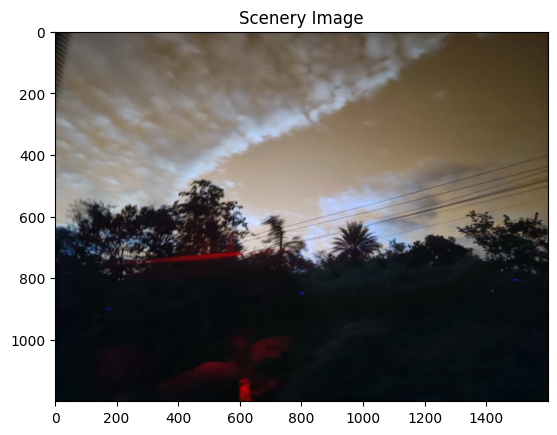


Image Processing Menu:

+--------------+--------------------------------+
| Index Number |            Function            |
+--------------+--------------------------------+
|      1       |           Grayscale            |
|      2       |         Gaussian Blur          |
|      3       |            Sharpen             |
|      4       | Adjust Contrast and Brightness |
|      5       |     Histogram Equalization     |
|      6       |     Edge Detection (Canny)     |
|      7       |       Contour Detection        |
|      8       |   Perspective Transformation   |
|      9       |             Erode              |
|      10      |            Dilation            |
|      11      |          Back to RGB           |
|      0       |              Exit              |
+--------------+--------------------------------+ 



In [ ]:
from prettytable import PrettyTable

def main():
    image_processor = SceneryImageProcessor("D:/Z/Downloads/lavasa picture.jpg")
    current_image = image_processor.image.copy()

    while True:
        
        menu = PrettyTable()
        menu.field_names = ["Index Number", "Function"]
        menu.add_row(["1", "Grayscale"])
        menu.add_row(["2", "Gaussian Blur"])
        menu.add_row(["3", "Sharpen"])
        menu.add_row(["4", "Adjust Contrast and Brightness"])
        menu.add_row(["5", "Histogram Equalization"])
        menu.add_row(["6", "Edge Detection (Canny)"])
        menu.add_row(["7", "Contour Detection"])
        menu.add_row(["8", "Perspective Transformation"])
        menu.add_row(["9", "Erode"])
        menu.add_row(["10", "Dilation"])
        menu.add_row(["11", "Back to RGB"])
        menu.add_row(["0", "Exit"])

        print("\nImage Processing Menu:\n")
        print(menu, "\n")

        choice = input("Enter your choice (0-9): ")

        if choice == '1':
            current_image = image_processor.applyGrayscale()
            
        elif choice == '2':
            current_image = image_processor.applyBlur()
            
        elif choice == '3':
            current_image = image_processor.applySharpen()
            
        elif choice == '4':
            alpha = float(input("Enter contrast factor (e.g., 1.5): "))
            beta = int(input("Enter brightness factor (e.g., 10): "))
            current_image = image_processor.applyContrast(alpha, beta)
            
        elif choice == '5':
            current_image = image_processor.applyHistogramEqualization()
            
        elif choice == '6':
            current_image = image_processor.applyEdgeDetection()
            
        elif choice == '7':
            current_image = image_processor.applyContours()
            
        elif choice == '8':
            x1 = int(input("X1: "))
            y1 = int(input("Y1: "))
            x2 = int(input("X2: "))
            y2 = int(input("Y2: "))
            x3 = int(input("X3: "))
            y3 = int(input("Y3: "))
            x4 = int(input("X4: "))
            y4 = int(input("Y4: "))
            print(" ")
            x1_ = int(input("New X1: "))
            y1_ = int(input("New Y1: "))
            x2_ = int(input("New X2: "))
            y2_ = int(input("New Y2: "))
            x3_ = int(input("New X3: "))
            y3_ = int(input("New Y3: "))
            x4_ = int(input("New X4: "))
            y4_ = int(input("New Y4: "))
            
            pts1 = np.float32([[x1, y2], [x2, y2], [x3, y3], [x4, y4]])
            pts2 = np.float32([[x1_, y2_], [x2_, y2_], [x3_, y3_], [x4_, y4_]])
            output_size = (250, 250)
            current_image = image_processor.applyWarpPerspective(pts1, pts2, output_size)
            
        elif choice == "9":
            eroded_result = image_processor.erode()
        
        elif choice == "10":
            dilated_result = image_processor.dilate()
            
        elif choice == "11":
            current_image = image_processor.applyRGB()
            
        elif choice == '0':
            print("\nThank you for using the program _/\_")
            break
            
        else:
            print("Invalid choice. Please enter a valid option (0-9).")

        image_processor.displayImage(current_image)

if __name__ == "__main__":
    main()

### GUI based Program

In [1]:
# Importing all the necessary libraries
import cv2
import numpy as np
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
from matplotlib import pyplot as plt

In [2]:
# Class for GUI 
class ImageProcessorApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Image Processor")

        self.image_processor = None
        self.image_path = None

        self.create_widgets()

    def create_widgets(self):
        # Create buttons for image processing functions
        self.load_button = tk.Button(self.root, text="Load Image", command=self.load_image)
        self.load_button.pack()

        self.process_button = tk.Button(self.root, text="Process Image", command=self.process_image, state=tk.DISABLED)
        self.process_button.pack()

        # Create canvas to display the image
        self.canvas = tk.Canvas(self.root, width=400, height=400)
        self.canvas.pack()

        # Create dropdown for image processing functions
        self.processing_functions = [
            "Grayscale",
            "RGB",
            "Blur",
            "Sharpen",
            "Contrast",
            "Histogram Equalization",
            "Edge Detection",
            "Contours",
        ]
        self.selected_function = tk.StringVar(self.root)
        self.selected_function.set(self.processing_functions[0])
        self.function_dropdown = tk.OptionMenu(self.root, self.selected_function, *self.processing_functions)
        self.function_dropdown.pack()

        # Create a button to apply the selected function
        self.apply_button = tk.Button(self.root, text="Apply Function", command=self.apply_function, state=tk.DISABLED)
        self.apply_button.pack()

    def load_image(self):
        file_path = filedialog.askopenfilename()
        if file_path:
            try:
                self.image_processor = SceneryImageProcessor(file_path)
                self.image_path = file_path
                self.process_button.config(state=tk.NORMAL)
                self.apply_button.config(state=tk.NORMAL)
                image = self.image_processor.applyRGB()
                if image is not None:
                    self.display_image(image)
                else:
                    # Handle the case where the image couldn't be loaded or is invalid.
                    self.display_image(None)
            except Exception as e:
                print(f"Error loading the image: {str(e)}")
                self.display_image(None)

    def process_image(self):
        if self.image_processor and self.image_path:
            self.display_image(self.image_processor.applyRGB())

    def apply_function(self):
        if self.image_processor and self.image_path:
            selected_function = self.selected_function.get()
            if selected_function == "Grayscale":
                processed_image = self.image_processor.applyGrayscale()
            elif selected_function == "RGB":
                processed_image = self.image_processor.applyRGB()
            elif selected_function == "Blur":
                processed_image = self.image_processor.applyBlur()
            elif selected_function == "Sharpen":
                processed_image = self.image_processor.applySharpen()
            elif selected_function == "Contrast":
                processed_image = self.image_processor.applyContrast()
            elif selected_function == "Histogram Equalization":
                processed_image = self.image_processor.applyHistogramEqualization()
            elif selected_function == "Edge Detection":
                processed_image = self.image_processor.applyEdgeDetection()
            elif selected_function == "Contours":
                processed_image = self.image_processor.applyContours()
            else:
                processed_image = None

            if processed_image is not None:
                self.display_image(processed_image)

    def display_image(self, image):
        if image is not None:
            b, g, r = cv2.split(image)
            image_rgb = cv2.merge((r, g, b))

            # Convert to PhotoImage for displaying in the canvas
            image_tk = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)
            image_tk = Image.fromarray(image_tk)
            photo = ImageTk.PhotoImage(image=image_tk)

            self.canvas.create_image(0, 0, anchor=tk.NW, image=photo)
            self.canvas.image = photo

In [ ]:
if __name__ == "__main__":
    root = tk.Tk()
    app = ImageProcessorApp(root)
    root.mainloop()

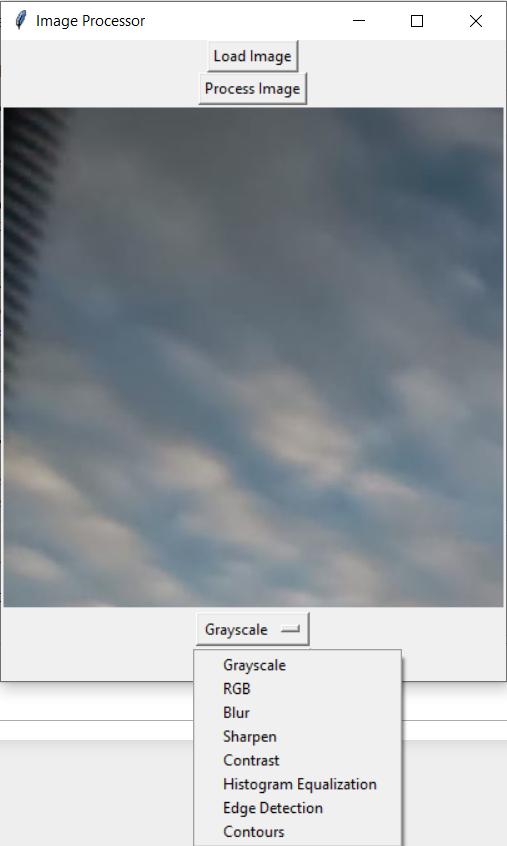

<hr>